#### About data

About this file

This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#loading our dataset
data =pd.read_csv("Student Mental health.csv")

In [32]:
#reading first 5 of our data
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Looking at the dataset and based on the data description we can see that the information recorded here is about students including their university academic information along with some questions relating to mental health.The information provided does not give a clear description of the type of different attributes used hence we will be doing more analysis to have a clear understanding of the data

In [33]:
data.shape

(101, 11)

Based on the structure of the data we can see that 101 students were recorded and with each based on  11 attributes ,now we want to check the type of data that was recorded whether the students had to select an option or give any numeric information

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

Age being recorded as a float raises question of whether there were any issues while the data was being recorded and we need to fix it ,and looking at the following columns:
* Choose your gender
* What is your course?

We will need to rename them as it is more intuitive to name them without referring to them as questions.The timestamp column does not serve any significant value as it just indicates the time the student was interviewed and has not effect on either mental health or grades.Give age is numeric we would like to check its distribution


In [35]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


* Based on this we can say that the average age is 20 years with the youngest student being 18 years old
* Another thing to note here is that the data is skewed to the right

#### Data Cleaning

In [36]:
data.drop(columns=['Timestamp'], inplace=True)

Now that we have removed the timestamp column we can now focus on the rest of the data

In [37]:
data.duplicated().sum()

0

No student's information was recorded more thasn once in the dataset.Now we look for any missing values before fixing naming of the columns or any structural issues

In [38]:
data.isnull().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

Only one was stundent's age was not recorded ,we will be removing this student's information since it would not have any significant impact on our data as we still have about 99% of the data intact

In [39]:
data.dropna(inplace=True)

In [40]:
data.reset_index(drop=True, inplace=True)
data.isnull().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [41]:
data.rename(columns={
    'Choose your gender': 'Gender',
    'Your current year of Study': 'Year of study',
    'What is your CGPA?':'CGPA Score Group'
}, inplace=True)

Now that the columns have proper naming we will be fixing any naming issues in the each  categorical column 

In [42]:
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")

Unique values in 'Gender': ['Female' 'Male']

Unique values in 'What is your course?': ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']

Unique values in 'Year of study': ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']

Unique values in 'CGPA Score Group': ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']

Unique values in 'Marital status': ['No' 'Yes']

Unique values in 'Do you have Depression?': ['Yes' 

Some of the courses have to be named to similar name as they represent the same course.Otherwise the other attributes have correct categories which fit wwith the questions asked

In [47]:
# 1. Strip whitespace and lowercase everything for consistency
data['What is your course?'] = data['What is your course?'].str.strip().str.lower()

# 2. Map similar values to a common name
course_mapping = {
    'engineering': 'Engineering',
    'engin': 'Engineering',
    'engine': 'Engineering',

    'bit': 'BIT',
    'bcs': 'BCS',
    'it': 'IT',
    'cts': 'CTS',

    'psychology': 'Psychology',
    'biomedical science': 'Biomedical Science',

    'koe': 'KOE',
    'koe': 'KOE',

    'kirkhs': 'KIRKHS',
    'irkhs': 'KIRKHS',

    'benl': 'BENL',
    'ala': 'ALA',

    'pendidikan islam': 'Pendidikan Islam',
    'islamic education': 'Islamic Education',

    'law': 'Law',
    'laws': 'Law',

    'human resources': 'Human Resources',
    'human sciences': 'Human Sciences',

    'kenms': 'KENMS',
    'econs': 'Econs',
    'enm': 'ENM',

    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'accounting': 'Accounting',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'malcom': 'Malcom',
    'kop': 'KOP',
    'mhsc': 'MHSC',

    'radiography': 'Radiography',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma tesl': 'Diploma TESL',
    'diploma nursing': 'Diploma Nursing',
    'nursing': 'Nursing',

    'fiqh fatwa': 'Fiqh',
    'fiqh': 'Fiqh',
    'Mathemathics': 'Mathematics',
    'marine science': 'Marine Science',
}

# 3. Apply the mapping
data['What is your course?'] = data['What is your course?'].replace(course_mapping)




In [48]:
data['What is your course?'].unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'KIRKHS',
       'Psychology', 'KENMS', 'Accounting', 'ENM', 'Marine Science',
       'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin',
       'TAASL', 'ALA', 'Biomedical Science', 'BENL', 'IT', 'CTS', 'Econs',
       'MHSC', 'Malcom', 'KOP', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh',
       'Diploma TESL', 'Nursing'], dtype=object)

Now we have to check for any outliers in the Age column

In [54]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Gender, Age, What is your course?, Year of study, CGPA Score Group, Marital status, Do you have Depression?, Do you have Anxiety?, Do you have Panic attack?, Did you seek any specialist for a treatment?]
Index: []


Since we do not have any outliers in our data, we can  chnge the column type of Age to integer and expand on the analysis

In [75]:
data['Age'] = data['Age'].astype('int')

In [59]:
data.groupby('Do you have Depression?')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Do you have Depression?,,,,,,,,
No,65.0,20.661538,2.557324,18.0,18.0,19.0,24.0,24.0
Yes,35.0,20.285714,2.395724,18.0,18.0,19.0,23.0,24.0


In [61]:
pd.crosstab(data['Do you have Depression?'], data['Did you seek any specialist for a treatment?'], normalize='index') * 100


Did you seek any specialist for a treatment?,No,Yes
Do you have Depression?,,
No,100.000000,0.000000
Yes,82.857143,17.142857


Only 17% of the students suffering from depression are seeking medical treatment ,which raises questions about awareness about mental health and what else could be causing them not to seek help and what impact this on their CGPA score

In [68]:
filtered = data[data['Do you have Depression?'] == 'Yes']

pd.crosstab(
    filtered['CGPA Score Group'],
    filtered['Did you seek any specialist for a treatment?'],
    normalize='index'
) * 100


Did you seek any specialist for a treatment?,No,Yes
CGPA Score Group,,
2.50 - 2.99,33.333333,66.666667
3.00 - 3.49,100.000000,0.000000
3.50 - 4.00,66.666667,33.333333
3.50 - 4.00,100.000000,0.000000


Based on the data students who who are taking seeking any help seem to be not performing well and those not seeking help are doing well academically which might indicate that seeking help might be having some side effect on academic performence

### Data Visualization

We want to check the relationship between the mental health issues with some of the attributes wit hpersonala information as they can show us how one affect the other

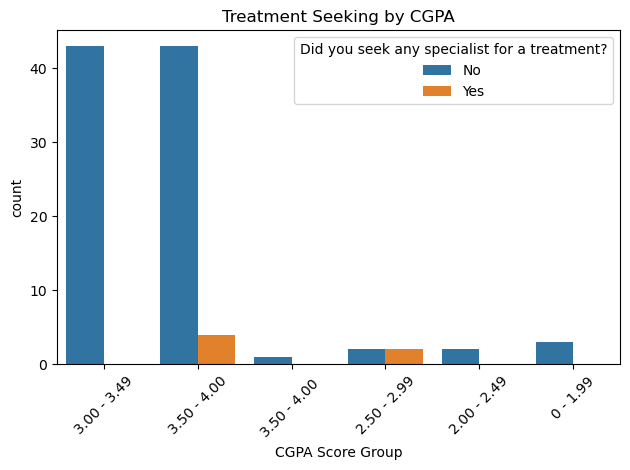

In [76]:
sns.countplot(
    x='CGPA Score Group', 
    hue='Did you seek any specialist for a treatment?', 
    data=data
)

plt.title('Treatment Seeking by CGPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


from the above graph you can see that many students do not seek any help with their mental issues so we cannot conclude anything on the effect of seeking help on academic performance

Text(0.5, 1.0, 'Treatment Seeking by Age')

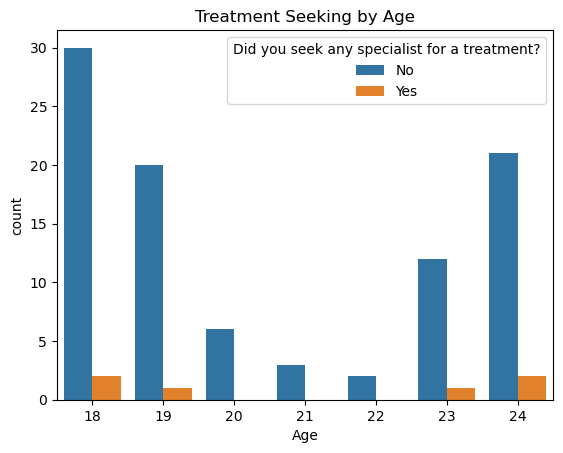

In [109]:
sns.countplot(
    x='Age', 
    hue='Did you seek any specialist for a treatment?', 
    data=data
)
plt.title('Treatment Seeking by Age')

We also see that students between ages 20  and 22 do not seek any help 

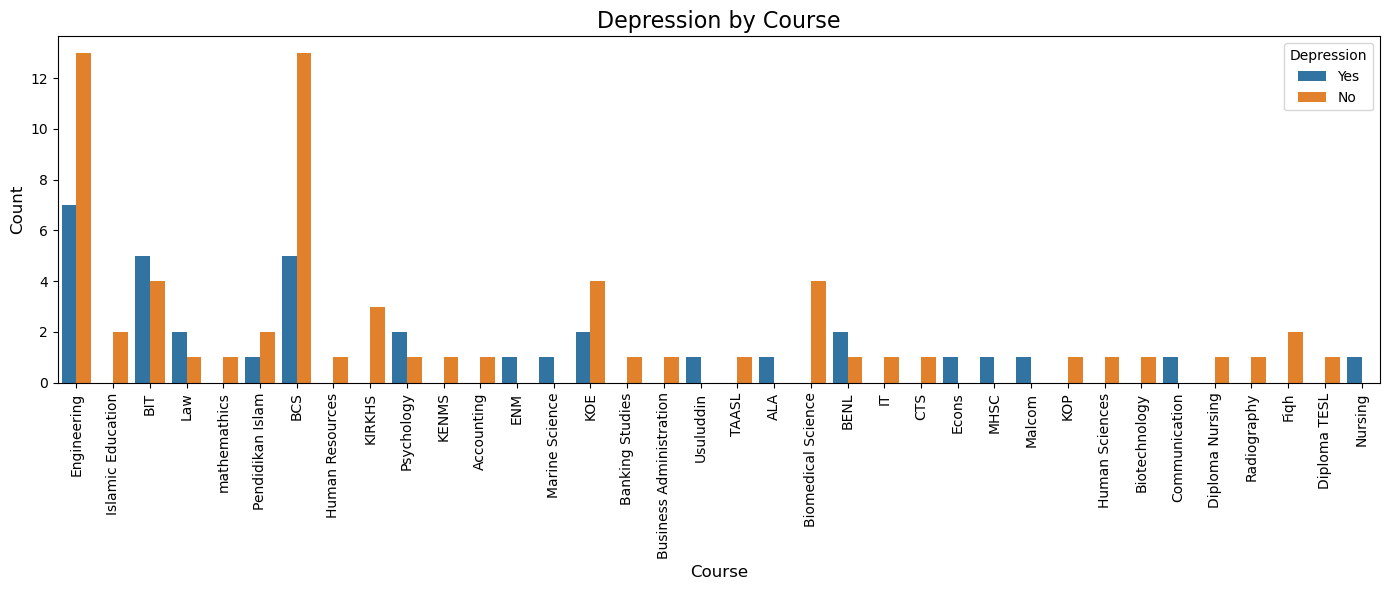

In [110]:
plt.figure(figsize=(14, 6))  
sns.countplot(
    x='What is your course?', 
    hue='Do you have Depression?', 
    data=data
)

plt.title('Depression by Course', fontsize=16)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  
plt.legend(title='Depression')
plt.tight_layout()
plt.show()


We see that engieering students have the highest numbers for depression which might be cause by other factors like the difficulty of the course  so we will have to check the CGPA  of this students for engineering

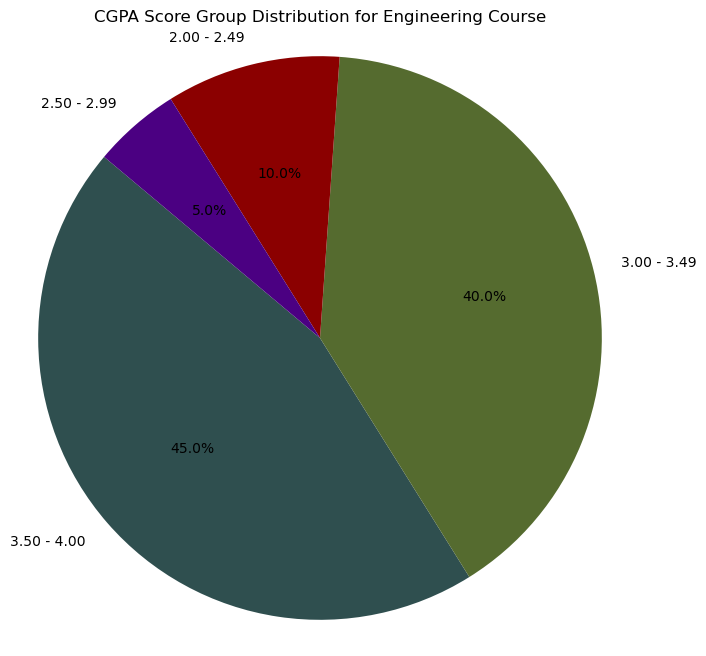

In [116]:
engineering_data = data[data['What is your course?'] == 'Engineering']


cgpa_counts = engineering_data['CGPA Score Group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cgpa_counts, labels=cgpa_counts.index, autopct='%1.1f%%', startangle=140, colors=['#2f4f4f', '#556b2f', '#8b0000', '#4b0082'])
plt.title('CGPA Score Group Distribution for Engineering Course')
plt.axis('equal')  
plt.show()


We can clearly see that majority of the engineering students have high CGPA  which might indicate that the reason they have highest number of depression rate is the pressure they have to succeed but further investigation need to be done

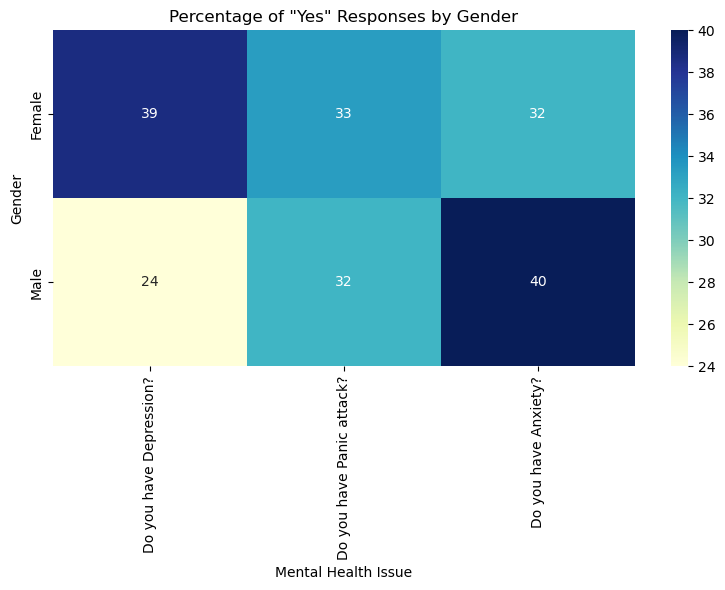

In [87]:
cols = ['Do you have Depression?', 'Do you have Panic attack?', 'Do you have Anxiety?']
heat_data = pd.DataFrame()

for col in cols:
    temp = pd.crosstab(data['Gender'], data[col], normalize='index') * 100
    heat_data = pd.concat([heat_data, temp['Yes']], axis=1)

heat_data.columns = cols

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu')
plt.title('Percentage of "Yes" Responses by Gender')
plt.ylabel('Gender')
plt.xlabel('Mental Health Issue')
plt.tight_layout()
plt.show()


"Females exhibit higher rates of depression, while males show higher rates of anxiety. This raises important questions about the underlying differences between the two genders in relation to these mental health conditions.

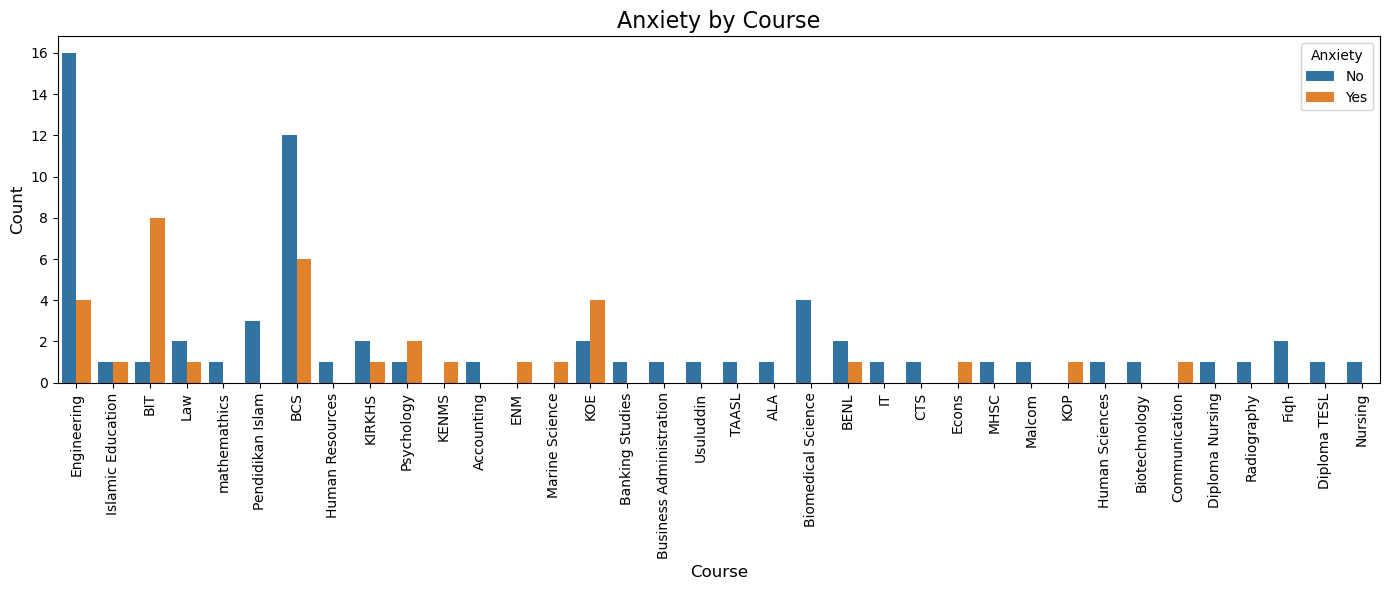

In [117]:
plt.figure(figsize=(14, 6))  
sns.countplot(
    x='What is your course?', 
    hue='Do you have Anxiety?', 
    data=data
)

plt.title('Anxiety by Course', fontsize=16)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90) 
plt.legend(title='Anxiety')
plt.tight_layout()
plt.show()


Compare with depression there are more students who do not suffer from anxiety but students doing BIT have the highest rate of anxiety

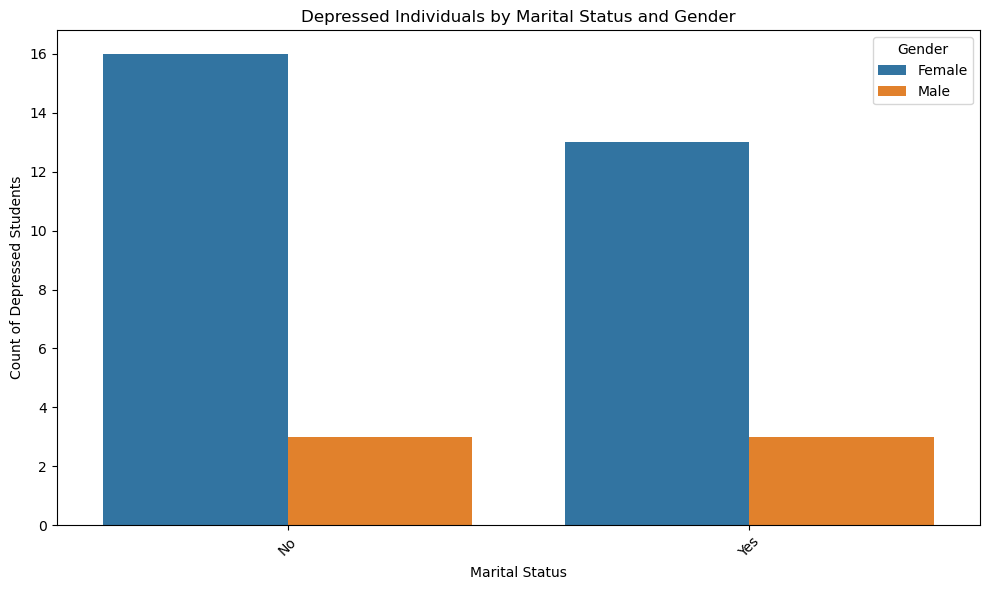

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Marital status',
    hue='Gender',
    data=data[data['Do you have Depression?'] == 'Yes']
)
plt.title('Depressed Individuals by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count of Depressed Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Similarly here we can see that female students have higher number of depression which also be to the ratio between male and female students 

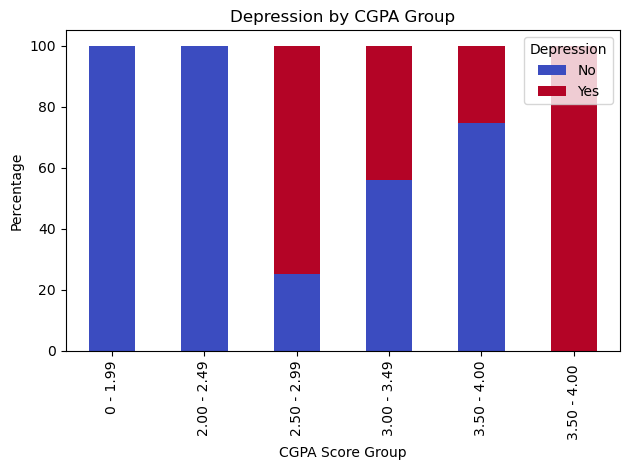

In [93]:
crosstab = pd.crosstab(data['CGPA Score Group'], data['Do you have Depression?'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Depression by CGPA Group')
plt.ylabel('Percentage')
plt.xlabel('CGPA Score Group')
plt.legend(title='Depression')
plt.tight_layout()
plt.show()


Students with the highest CGPA  have high depression rates compared to others and basedon the previous plots they have the lowest number for people seeking help which is really concerning.

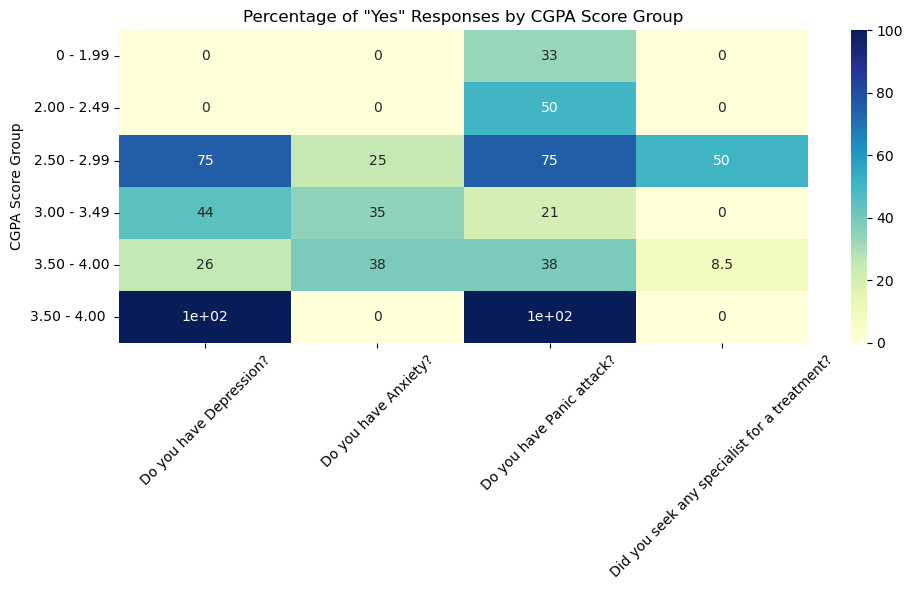

In [119]:
cols = [
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?',
    'Did you seek any specialist for a treatment?'
]

heat_data = pd.DataFrame()

for col in cols:
    temp = pd.crosstab(data['CGPA Score Group'], data[col], normalize='index') * 100
    heat_data = pd.concat([heat_data, temp['Yes']], axis=1)

heat_data.columns = cols

plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu')
plt.title('Percentage of "Yes" Responses by CGPA Score Group')
plt.ylabel('CGPA Score Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Students with CGPA of 2.5-2.99 suffer from either depression and panick attacks similarly to those with cgpa of 3.5-4.0 but they are seeking help which might indicate that seeking help doesnt have any effect on student's academic performance if they suffer any mental illness

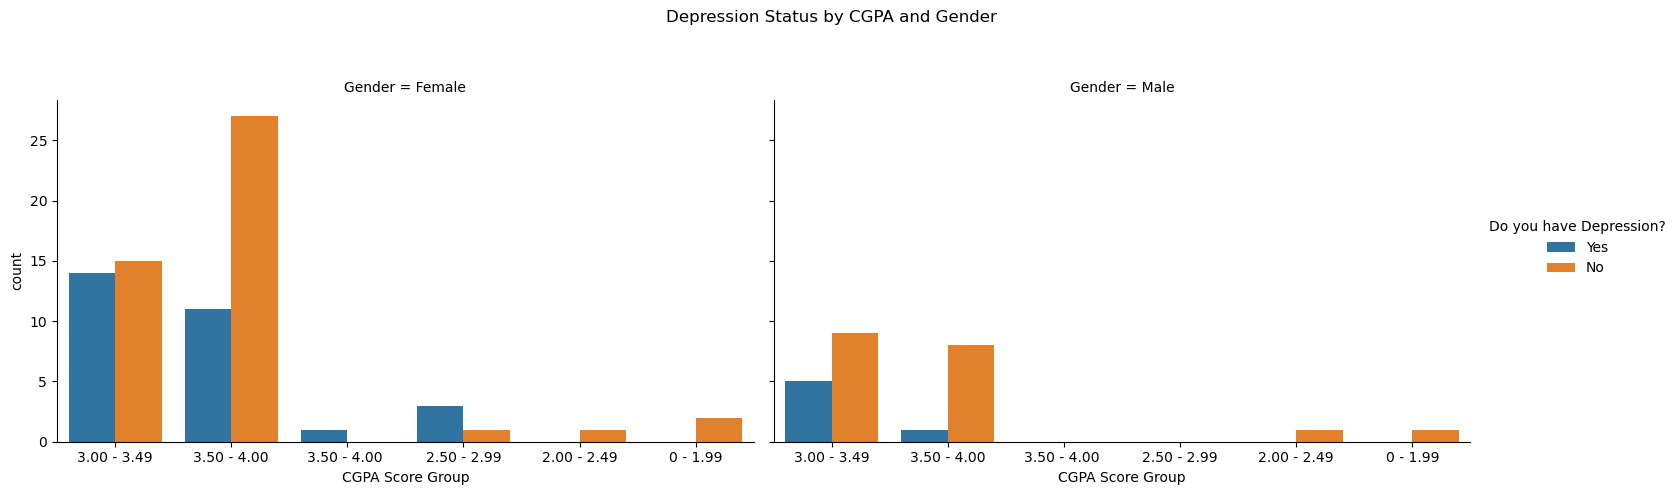

In [106]:
sns.catplot(
    x='CGPA Score Group',
    hue='Do you have Depression?',
    col='Gender',
    kind='count',
    data=data,
    height=5,
    aspect=1.5  # increase from 0.9 to 1.5 (or even 2 for more width)
)

plt.subplots_adjust(top=0.8)
plt.suptitle('Depression Status by CGPA and Gender')
plt.show()


### Model Building 

#### Model Selection

#### Model Evaluation

#### **Conclusion**

Based on the analysis done we can come to the following decision:
* Many student suffering from depression are not seeking any help and those that are seeking help have no improvement in their CGPA
* There is a strong relationship between the course a student does and some of the mental illnesses
* Female student tend to suffer from depression whereas male students suffer from anxiety more
* Marital Status doesnt have a high impact on some of the illnesses